# Video Game Ratings

Author: Riley Rongere

Date: 03/22/2023

**Used Resources**

* https://www.nickmccullum.com/python-visualization/subplots/
* https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
* https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe

**Dataset**
* https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games/discussion/349659#1939811

# Objective:

The goal of this project is to create a model that may be able to predict whether or not a video game will be rated well prior to release based upon the release year as well as the genre's that fit the game. 

The selction of these columns of data resulted from the desire to predict a rating prior to release, which removes the number of votes, as well as ignoring attributes that are either irrelivent such as url and index, or are not easily quantifiable such as title and description.

Several models will be tested with both normalized and non-normalized data to see which model performs the best and with which data.

The data being used for this experiment is the IMDB Video Games dataset provided by MUHAMMAD ADIL TALAY on Kaggle.

# Data Preparation

* Remove 'name', 'Unamed: 0', 'url', 'plot', 'votes' since they are either nor relavant or not what indicators that I want to translate into usable information (whether the name or plot has an impact)
* Remove the certificate column due to the number of missing values (12900 of 20803). 
* Removing nan leaves 11599 rows to work with. (removes games with missing year and/or rating/votes)
* Change the true/false values for the genre columns to 1/0 by multiplying the dataframe by 1
* Checked for unique values in the working columns as to ensure that there was no values theat could not be used/converted to useable values.

In [ ]:
# load and preapre data:
import sklearn
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')
games = pd.read_csv('/content/drive/MyDrive/CS167-Machine_Learning/datasets/imdb-videogames.csv')
games.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [ ]:
print(games.shape)
print(games.isna().sum())

(20803, 17)
Unnamed: 0         0
name               0
url                0
year             267
certificate    12900
rating          9203
votes           9203
plot               0
Action             0
Adventure          0
Comedy             0
Crime              0
Family             0
Fantasy            0
Mystery            0
Sci-Fi             0
Thriller           0
dtype: int64


In [ ]:
#create a subset of the data with year, rating, votes, and genres
games_copy = games.drop(['Unnamed: 0','name','url','certificate','plot','votes'],axis = 1)
#remove the na data
games_copy.dropna(inplace = True)#check for irregular values
# print(games_copy.year.unique())
# print(games_copy.rating.unique())
# print(games_copy.votes.unique())
# def value_to_float(x):
#   if ',' in x:
#     x = x.replace(',','')
#   x = float(x)
#   return x

# games_copy['votes'] = games_copy['votes'].apply(value_to_float)
games_copy = games_copy*1
# games_copy['num_genres'] = games_copy.drop(['year','rating','votes'],axis=1).sum(axis = 1)
# games_copy = games_copy[['year','rating','num_genres']]
games_copy

,year,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,2018.0,9.2,1,1,0,0,0,1,0,0,0
1,2018.0,9.7,1,1,0,1,0,0,0,0,0
2,2013.0,9.5,1,0,0,1,0,0,0,0,0
3,2018.0,9.6,1,1,0,0,0,0,0,0,0
4,2016.0,9.5,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20759,1987.0,5.3,0,0,0,0,0,0,0,0,1
20760,2017.0,7.9,0,0,0,0,0,0,0,0,1
20772,2020.0,5.4,1,0,0,0,0,0,0,0,1
20774,2013.0,6.0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
target= 'rating'
predictors = ['year','Action','Adventure','Comedy','Crime','Family','Fantasy','Mystery','Sci-Fi','Thriller']
train_data, test_data, train_sln, test_sln = train_test_split(games_copy[predictors], games_copy[target], test_size = 0.2, random_state=41)
train_data.shape

(9279, 10)

# Research

## Non-Normalized Data

In [ ]:
# kNN
k_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
kNN_r2 = []

for k in k_vals:
  knn = neighbors.KNeighborsRegressor(n_neighbors = k)
  knn.fit(train_data,train_sln)
  score_prediction = knn.predict(test_data)
  current_r2 = r2_score(test_sln,score_prediction)
  kNN_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,1)
# plt.plot(k_vals,kNN_r2,'ro-',label='k-NN')
# plt.title('IMDB k-NN Experiment r2')
# plt.xlabel('k')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

-0.1517825357372069
-0.03472563843870469
0.018799002639734663
0.05364673188947189
0.07193837397238678
0.08202254571385925
0.08763309065967184
0.08802959616589001
0.0946105384546273
0.09804790515018347
0.10559050708518314
0.10303166874055525
0.10079358110189374
0.10071025760725238


In [ ]:
# w-kNN
wk_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
wkNN_r2 = []

for k in wk_vals:
  wknn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='distance')
  wknn.fit(train_data,train_sln)
  score_prediction = wknn.predict(test_data)
  current_r2 = r2_score(test_sln,score_prediction)
  wkNN_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,2)
# plt.plot(wk_vals,wkNN_r2,'ro-',label='wk-NN')
# plt.title('IMDB Weighted k-NN Experiment r2')
# plt.xlabel('k')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

-0.16904707517799844
-0.07363919164163613
-0.030159727740582287
-0.01533938872295959
-0.004110086569767635
-4.366855798076941e-05
0.00039038585369777223
0.00020032791108082204
0.006899473780811016
0.007695197871593118
0.007566095469091705
0.0069106965663854325
0.006831996957954889
0.006604690220317955


In [ ]:
#decision tree
dt_leaf_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
dt_r2 = []

for num_leaves in dt_leaf_vals:
  dt = tree.DecisionTreeRegressor(min_samples_leaf=num_leaves)
  dt.fit(train_data,train_sln)
  score_prediction = dt.predict(test_data)
  current_r2 = r2_score(test_sln,score_prediction)
  dt_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,3)
# plt.plot(dt_leaf_vals,dt_r2,'ro-',label='decision tree')
# plt.title('IMDB Decision Tree Experiment r2')
# plt.xlabel('min samples per leaf')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

0.035660210079797805
0.05563174367840118
0.06688139816017957
0.0675679392079116
0.07333701035725926
0.07788091180756473
0.08023558407091724
0.08247429425804087
0.08620841322411499
0.08462262102533558
0.08476581261223681
0.08748749426083247
0.08991761814394872
0.09161233080578168


In [ ]:
#Random Forests
rf_leaf_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
rf_r2 = []

for num_leaves in dt_leaf_vals:
  rf = tree.DecisionTreeRegressor(min_samples_leaf=num_leaves)
  rf.fit(train_data,train_sln)
  score_prediction = rf.predict(test_data)
  current_r2 = r2_score(test_sln,score_prediction)
  rf_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,4)
# plt.plot(rf_leaf_vals,rf_r2,'ro-',label='random forest')
# plt.title('IMDB Random Forest Experiment r2')
# plt.xlabel('min samples per leaf')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

0.035660210079797805
0.0556317436784014
0.06688139816017968
0.0675679392079116
0.07333701035725926
0.07788091180756473
0.08023558407091735
0.08247429425804065
0.0862084132241151
0.08280818135552426
0.08476581261223681
0.08777137424052817
0.08961795720402765
0.0916123308057818


## Normalized Data

In [ ]:
#Normalize the data
scaler = StandardScaler()

train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

train_data_scale = scaler.fit_transform(train_data_copy)
test_data_scale = scaler.fit_transform(test_data_copy)

In [ ]:
# kNN with normalized data
nk_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
nkNN_r2 = []

for k in nk_vals:
  nknn = neighbors.KNeighborsRegressor(n_neighbors = k)
  nknn.fit(train_data_scale,train_sln)
  score_prediction = nknn.predict(test_data_scale)
  current_r2 = r2_score(test_sln,score_prediction)
  nkNN_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,5)
# plt.plot(nk_vals,nkNN_r2,'ro-',label='k-NN')
# plt.title('IMDB Normalized k-NN Experiment r2')
# plt.xlabel('k')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

-0.14004191509595088
-0.00871924754011455
0.02691866079085814
0.06604319036267525
0.08469826618815757
0.09304221813085911
0.0977921570377851
0.10284274298021956
0.10378516599295651
0.10848767468446374
0.10825347975668542
0.11230764119700198
0.1112306391487945
0.11247385232764995


In [ ]:
# normalized w-kNN
nwk_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
nwkNN_r2 = []

for k in nwk_vals:
  nwknn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='distance')
  nwknn.fit(train_data_scale,train_sln)
  score_prediction = nwknn.predict(test_data_scale)
  current_r2 = r2_score(test_sln,score_prediction)
  nwkNN_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,6)
# plt.plot(nwk_vals,nwkNN_r2,'ro-',label='wk-NN')
# plt.title('IMDB Normalized Weighted k-NN Experiment r2')
# plt.xlabel('k')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

-0.1412556968706924
-0.012262664124811806
0.02507271458807958
0.06374100504238922
0.08304025824695072
0.09169557089975833
0.09594568302956608
0.1010500625139984
0.10330780508456339
0.10872066232632094
0.11049011836629119
0.11313090111206858
0.11307249764862215
0.11443131330778689


In [ ]:
#normalized decision tree
ndt_leaf_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
ndt_r2 = []

for num_leaves in ndt_leaf_vals:
  ndt = tree.DecisionTreeRegressor(min_samples_leaf=num_leaves)
  ndt.fit(train_data_scale,train_sln)
  score_prediction = ndt.predict(test_data_scale)
  current_r2 = r2_score(test_sln,score_prediction)
  ndt_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,7)
# plt.plot(ndt_leaf_vals,ndt_r2,'ro-',label='decision tree')
# plt.title('IMDB Normalized Decision Tree Experiment r2')
# plt.xlabel('min samples per leaf')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

0.035660210079797805
0.0556317436784014
0.06688139816017957
0.06756793920791149
0.07333701035725937
0.07788091180756473
0.08023558407091735
0.08247429425804054
0.08620841322411521
0.08462262102533546
0.08300445729464156
0.08777137424052806
0.08961795720402765
0.09161233080578168


In [ ]:
#Normalized Random Forests
nrf_leaf_vals = [3,5,7,11,15,19,23,27,31,35,39,43,47,51] #9279 rows in training set
nrf_r2 = []

for num_leaves in nrf_leaf_vals:
  nrf = ensemble.RandomForestRegressor(min_samples_leaf=num_leaves)
  nrf.fit(train_data_scale,train_sln)
  score_prediction = nrf.predict(test_data_scale)
  current_r2 = r2_score(test_sln,score_prediction)
  nrf_r2.append(current_r2)
  print(current_r2)

# plt.subplot(2,4,8)
# plt.plot(nrf_leaf_vals,nrf_r2,'ro-',label='random forest')
# plt.title('IMDB Normalized Random Forest Experiment r2')
# plt.xlabel('min samples per leaf')
# plt.ylabel('r2')

# plt.axis([0,54,-.3,.3])

# plt.show()

0.06727923700913707
0.08294900257507987
0.08789176908199525
0.09852251173203552
0.09973681405874257
0.10290602345099709
0.10577110828682768
0.11086834042587967
0.11258533971774554
0.11609060890994538
0.1176831124170814
0.12029388194193524
0.11881532868974165
0.1201258321188221


## Charts

(0.0, 54.0, -0.2, 0.2)

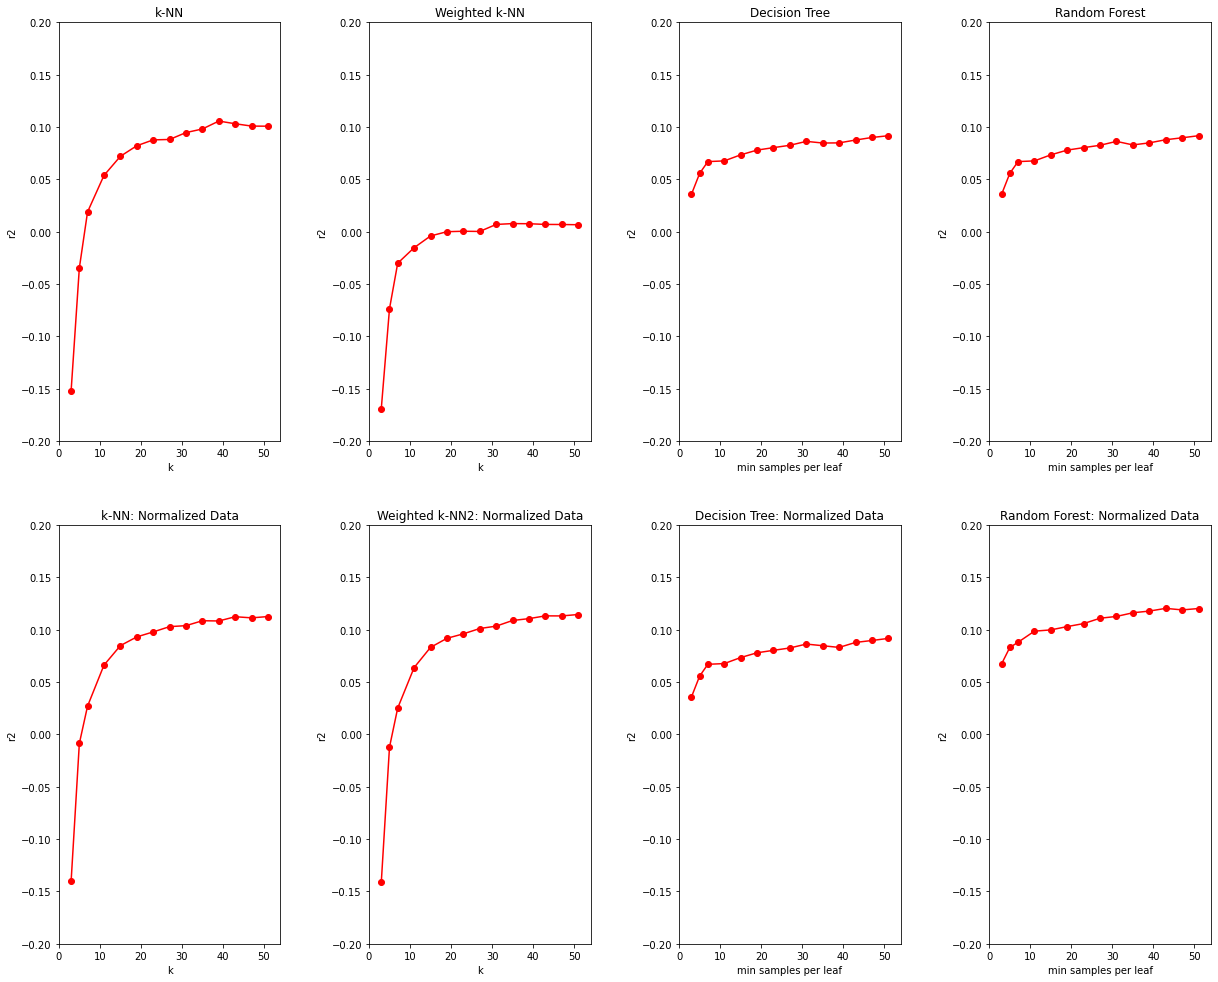

In [ ]:
plt.figure(figsize=(20,16))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)

plt.subplot(2,4,1)
plt.plot(k_vals,kNN_r2,'ro-',label='k-NN')
plt.title('k-NN')
plt.xlabel('k')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

plt.subplot(2,4,2)
plt.plot(wk_vals,wkNN_r2,'ro-',label='wk-NN')
plt.title('Weighted k-NN')
plt.xlabel('k')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

plt.subplot(2,4,3)
plt.plot(dt_leaf_vals,dt_r2,'ro-',label='decision tree')
plt.title('Decision Tree')
plt.xlabel('min samples per leaf')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

plt.subplot(2,4,4)
plt.plot(rf_leaf_vals,rf_r2,'ro-',label='random forest')
plt.title('Random Forest')
plt.xlabel('min samples per leaf')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

plt.subplot(2,4,5)
plt.plot(nk_vals,nkNN_r2,'ro-',label='k-NN')
plt.title('k-NN: Normalized Data')
plt.xlabel('k')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

plt.subplot(2,4,6)
plt.plot(nwk_vals,nwkNN_r2,'ro-',label='wk-NN')
plt.title('Weighted k-NN2: Normalized Data')
plt.xlabel('k')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

plt.subplot(2,4,7)
plt.plot(ndt_leaf_vals,ndt_r2,'ro-',label='decision tree')
plt.title('Decision Tree: Normalized Data')
plt.xlabel('min samples per leaf')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

plt.subplot(2,4,8)
plt.plot(nrf_leaf_vals,nrf_r2,'ro-',label='random forest')
plt.title('Random Forest: Normalized Data')
plt.xlabel('min samples per leaf')
plt.ylabel('r2')
plt.axis([0,54,-.2,.2])

# Analysis

**Models, their best R-squared scores, and their tuned parameters**

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |.1056               |.1125           |k-value              |
| w-kNN         |.0077               |.1144           |k-value              |
| decision tree |.0916               |.0916           |min-samples per leaf |
| random forest |.0916               |.1201           |min-samples per leaf |

Discoveries: Training several machine learning models to predict the IMDB rating of a video game using the release year as well as the genre(s) of the game resulted in models that do not effectively predict these scores. This is shown consistenty by R-squared scores that fall well below acceptable ranges for them to be considered effective predictors. 

The best instances of each of the tested models as described in the table above, produced an R-squared value near 0.1. The worst performing of these models was a weighted k-nearest neigbors model with non-normalized data which at best produced an R-squared value of 0.0077. The best performing model was a random forest using normalized data which produced an R-squared value of 0.1201.

Overall, each of the eight models used performed poorly. This is likely due to the genre and release year not being as closely related to the IMDB rating as I had originally predicted. Further, the number of predictors used, ten in this case, more than likely decreased the models abilities to predict the score.  

# Bumps in the Road

* Biggest issue was the large amount of missing data. Removing all rows with missing data from the working subset of columns leaves 9279 rows of 20803.
* Researching webscraping in order to potentially recover some of the missing data. Determined that it was impractical given the difficulty of the task as well as the timeframe for the assignment.
* Deciding which columns of the data set to use as predictors. I ended up using the columns that would be available prior to a games release and would also be easily quantifiable.
* Converting the values from the original dataframe into numeric values. In particular, converting the true/false values of the genre columns into numeric values, which had a simple solution, as well as converting the votes column from a string containing a comma, into a numeric value, which didn't end up being used.
* Difficulties getting the graphs to display correctly using the matplotlib subplots functionality